In [9]:
from datetime import datetime, timedelta

import pandas as pd
import yfinance as yf
import talib

class PriceHistoryProvider:
    def __init__(self, window_days: int = 120, symbol: str = "AAPL"):
        self.window_days = window_days
        self.end_date = datetime.today()-timedelta(days=-1) # Start yesterday
        self.begin_date = self.end_date-timedelta(days=self.window_days)
        self.init_df = yf.download(symbol, start=self.begin_date, end=self.end_date, progress=False, multi_level_index=False)
        self.df = self.prices()

    def ta_calculator(self):
        try:
            # Overlap Studies
            self.df['MA'] = talib.MA(self.df['Close'], timeperiod=10) #windowed TAs produce lots of null values in demo...
            self.df['EMA'] = talib.EMA(self.df['Close'], timeperiod=10)
            self.df['KAMA'] = talib.KAMA(self.df['Close'], timeperiod=10)
            self.df['WMA'] = talib.WMA(self.df['Close'], timeperiod=10)
            self.df['MidPrice'] = talib.MIDPRICE(self.df['High'], self.df['Low'], timeperiod=10)

            # Momentum Indicator
            self.df['ADX'] = talib.ADX(self.df['High'], self.df['Low'], self.df['Close'],timeperiod=10)
            self.df['BOP'] = talib.BOP(self.df['Open'], self.df['High'], self.df['Low'],self.df['Close'])
            self.df['CMO'] = talib.CMO(self.df['Close'], timeperiod=10)
            self.df['MFI'] = talib.MFI(self.df['High'], self.df['Low'], self.df['Close'],self.df['Volume'])
            self.df['ROC'] = talib.ROC(self.df['Close'], timeperiod=10)
            self.df['WILLR'] = talib.WILLR(self.df['High'], self.df['Low'], self.df['Close'],timeperiod=14)

            # Volume
            self.df['AD'] = talib.AD(self.df['High'], self.df['Low'], self.df['Close'],self.df['Volume'])
            self.df['OBV'] = talib.OBV(self.df['Close'], self.df['Volume'])

            # Volatility
            self.df['NATR'] = talib.NATR(self.df['High'], self.df['Low'], self.df['Close'],timeperiod=14)
            self.df['ATR'] = talib.ATR(self.df['High'], self.df['Low'], self.df['Close'],timeperiod=14)
            self.df['TRANGE'] = talib.TRANGE(self.df['High'], self.df['Low'], self.df['Close'])

            # Misc.
            self.df['TSF'] = talib.TSF(self.df['Close'], timeperiod=14)
        except Exception as e:
            print("[PriceHistoryProvider] TA computing error.", repr(e))

    def prices(self) -> pd.DataFrame | None:
        print(f"[PriceHistoryProvider] prices() called for.")
        try:
            self.df = self.init_df.copy()
            #self.df = self.df.drop("Volume", axis=1)
            self.ta_calculator()
            #self.df = self.df.dropna()

            if isinstance(self.df, pd.DataFrame) and not self.df.empty:
                # optional timezone normalize
                if hasattr(self.df.index, "tz_localize"):
                    try:
                        self.df.index = self.df.index.tz_localize(None)
                    except Exception:
                        pass
            return self.df
        except Exception as e:
            print("[PriceHistoryProvider] yfinance download error.", repr(e))

hist_price = PriceHistoryProvider(window_days=30, symbol="AAPL")
hist_price.df

# missing visualization renderings

/var/folders/wf/97z96ywj499_bd2wt87b__xr0000gp/T/ipykernel_91520/328775719.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.init_df = yf.download(symbol, start=self.begin_date, end=self.end_date, progress=False, multi_level_index=False)


[PriceHistoryProvider] prices() called for.


,Close,High,Low,Open,Volume,MA,EMA,KAMA,WMA,MidPrice,...,CMO,MFI,ROC,WILLR,AD,OBV,NATR,ATR,TRANGE,TSF
Date,,,,,,,,,,,,,,,,,,,,,
2025-09-18,237.880005,241.199997,236.649994,239.970001,44249600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-2.032544e+07,44249600.0,NaN,NaN,NaN,NaN
2025-09-19,245.500000,246.300003,240.210007,241.229996,163741300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.003966e+08,207990900.0,NaN,NaN,8.419998,NaN
2025-09-22,256.079987,256.640015,248.119995,248.300003,105517400,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.920425e+08,313508300.0,NaN,NaN,11.140015,NaN
2025-09-23,254.429993,257.339996,253.580002,255.880005,60275200,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.590191e+08,253233100.0,NaN,NaN,3.759995,NaN
2025-09-24,252.309998,255.740005,251.039993,255.220001,42303700,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.395775e+08,210929400.0,NaN,NaN,4.700012,NaN
2025-09-25,256.869995,257.170013,251.710007,253.210007,55202100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.887130e+08,266131500.0,NaN,NaN,5.460007,NaN
2025-09-26,255.460007,257.600006,253.779999,254.100006,46076300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.831647e+08,220055200.0,NaN,NaN,3.820007,NaN
2025-09-29,254.429993,255.000000,253.009995,254.559998,40127700,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.003044e+08,179927500.0,NaN,NaN,2.450012,NaN
2025-09-30,254.630005,255.919998,253.110001,254.860001,37704300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.033907e+08,217631800.0,NaN,NaN,2.809998,NaN


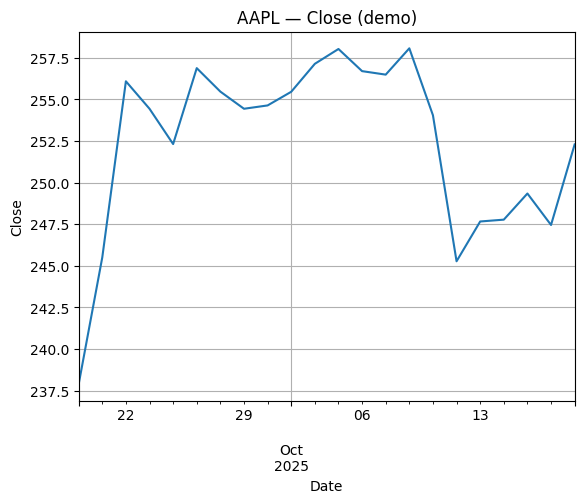

In [11]:
from matplotlib import pyplot as plt

# Plot with matplotlib: single plot, default colors
px = None
try:
    px = hist_price.df["Close"]

    plt.figure()
    px.plot()
    plt.title(f"AAPL — Close")
    plt.xlabel("Date")
    plt.ylabel("Close")
    plt.grid(True)
    plt.show()
except Exception as e:
    print("Error priinting out the visualizer.", repr(e))